Data loaded successfully.
Shape of the dataset: (891, 12)

Missing 'Age' values filled with median.
Handled categorical and unnecessary columns.

Input variables (X): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Target variable (y): Survived

Training set size: 712 samples
Testing set size: 179 samples

Model training completed.

--- Model Evaluation ---
Mean Squared Error (MSE): 0.1351
R-squared (R2) Score: 0.4430
------------------------

Sample predictions (continuous values):
[0.12317822 0.24612663 0.14280789 0.86574326 0.72032959 0.9612486
 0.66572522 0.08762561 0.72224673 0.93703043]

Sample predictions after rounding to 0 or 1:
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]

Accuracy after rounding predictions: 0.7933


C:\Users\saaja\AppData\Local\Temp\ipykernel_32640\3283593746.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


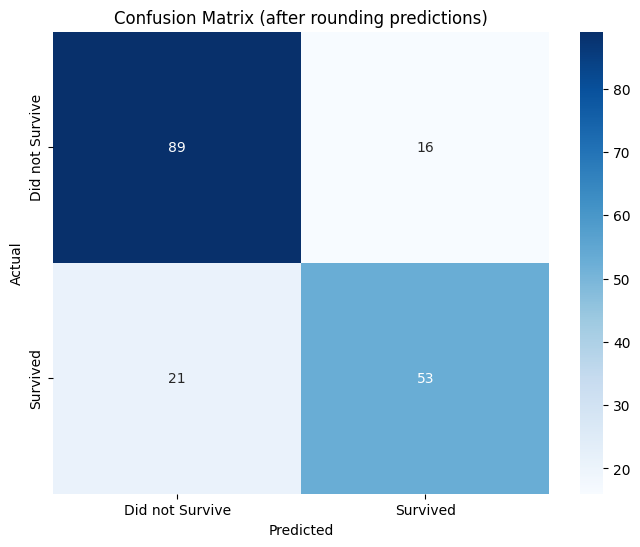

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Loading the dataset
try:
    # Corrected the filename to match the uploaded file
    df = pd.read_csv('titanic.csv')
    print("Data loaded successfully.")
    print("Shape of the dataset:", df.shape)
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Step 2: Exploring the dataset and handling the missing values
# Fill missing 'Age' values with the median. This is safer than the mean for skewed data.
df['Age'].fillna(df['Age'].median(), inplace=True)
print("\nMissing 'Age' values filled with median.")

# Drop columns that are not useful or are non-numeric text
# Also convert categorical columns ('Sex', 'Embarked') to numbers
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print("Handled categorical and unnecessary columns.")


# Step 3: Defining the input and target variables
# The input variables are all columns (X) except 'Survived'
# The target variable is 'Survived' (y)
X = df.drop(columns=['Survived'])
y = df['Survived']
print("\nInput variables (X):", X.columns.tolist())
print("Target variable (y):", y.name)

# Step 4: Split the Data into Training and Testing Sets
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures we get the same split every time for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Step 5: Initialize and Train the Linear Regression Model
model = LinearRegression()
# Train the model using the training data.
model.fit(X_train, y_train)
print("\nModel training completed.")


# Step 6: Make Predictions on the Test Set
y_pred = model.predict(X_test)


# Step 7: Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")
print("------------------------")

# --- Interpreting the Predictions ---
print("\nSample predictions (continuous values):")
print(y_pred[:10])

# To convert these to a 0 or 1 classification, you'd need to set a threshold.
y_pred_classified = np.round(y_pred)
print("\nSample predictions after rounding to 0 or 1:")
print(y_pred_classified[:10])

# Calculate accuracy after rounding
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"\nAccuracy after rounding predictions: {accuracy:.4f}")


# Step 8: Visualizing the Results   
cm = confusion_matrix(y_test, y_pred_classified)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix (after rounding predictions)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
